In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family = 'gulim')
plt.rc('axes', unicode_minus = False)

In [3]:
from sklearn.linear_model import LinearRegression

In [6]:
mtcars = pd.read_excel(r'C:\Users\user\Documents\GitHub\ML\ML\dataset_1\01_Data_handling\dataset/mtcars.xlsx')
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [7]:
train_X = mtcars.loc[:, 'cyl':'qsec']
train_y = mtcars.loc[:, 'mpg']

print(train_X.head())
print(train_y.head())

print("X type = ", type(train_X.head()))
print("y type = ", type(train_y.head()))

   cyl   disp   hp  drat     wt   qsec
0    6  160.0  110  3.90  2.620  16.46
1    6  160.0  110  3.90  2.875  17.02
2    4  108.0   93  3.85  2.320  18.61
3    6  258.0  110  3.08  3.215  19.44
4    8  360.0  175  3.15  3.440  17.02
0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64
X type =  <class 'pandas.core.frame.DataFrame'>
y type =  <class 'pandas.core.series.Series'>


In [8]:
lr = LinearRegression()
lr.fit(train_X, train_y)

LinearRegression()

In [10]:
print('Train R-square = ',lr.score(train_X, train_y)) ## R**2

Train R-square =  0.8548224115848233


In [16]:
# lr.coef_
# train_X.columns
coeff_df = pd.DataFrame(lr.coef_, index = train_X.columns, columns = ["coefficient"])
print(coeff_df)

      coefficient
cyl     -0.818560
disp     0.013205
hp      -0.017930
drat     1.320406
wt      -4.190832
qsec     0.401461


## KNN (k-nearest neighbors classifier)

In [17]:
# 도미자료
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 방어자료
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


# list 길이
print(type(bream_length))
print("length of bream = ", len(bream_length), "\nlength of smelt = ",len(smelt_length))

# 용약 통계량
print("mean of 도미길이 = ", round(np.mean(bream_length), ndigits = 2))
print("mean of 방어길이 = ", round(np.mean(smelt_length), ndigits = 2))

print("mean of 도미무게 = ", round(np.mean(bream_weight), ndigits = 2))
print("mean of 방어무게 = ", round(np.mean(smelt_weight), ndigits = 2))

<class 'list'>
length of bream =  35 
length of smelt =  14
mean of 도미길이 =  33.11
mean of 방어길이 =  11.92
mean of 도미무게 =  617.83
mean of 방어무게 =  11.18


In [18]:
import numpy as np
#도미도미 방어방어
#string interpolation
print("도미 무게 = {:.4f}, 길이 = {:.4f}".format(np.mean(bream_weight), np.mean(bream_length))) #스트링인더포메이션
print("방어 무게 = {:.4f}, 길이 = {:.4f}".format(np.mean(smelt_weight), np.mean(smelt_length)))


도미 무게 = 617.8286, 길이 = 33.1086
방어 무게 = 11.1786, 길이 = 11.9214


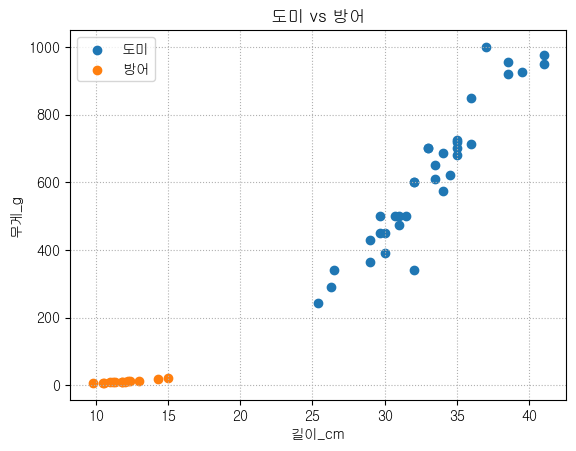

In [20]:
## scatter plot: 산점도
plt.scatter(bream_length, bream_weight, label = "도미")
plt.scatter(smelt_length, smelt_weight, label = "방어")
plt.title("도미 vs 방어")
plt.legend()
plt.xlabel("길이_cm")
plt.ylabel("무게_g")
plt.grid(linestyle = ":")
plt.show()

In [26]:
## list
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

print(np.shape(length))
print(np.shape(weight))

## x_2d
fish_data = np.column_stack([length, weight])
print(fish_data)

print(type(fish_data))
print(np.shape(fish_data)) #(49, 2) row : 49, columns : 2

(49,)
(49,)
[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
<class 'numpy.ndarray'>
(49, 2)


In [28]:
## 
fish_target = np.append(np.ones(len(bream_length)), np.zeros(len(smelt_length)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [29]:
## knn class
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LinearRegression

In [32]:
knn = KNeighborsClassifier(n_neighbors=5,
                            weights = 'uniform',
                            metric = 'minkowski',
                            p = 2)  # default parameter
knn.fit(fish_data, fish_target)
print('Train ACC(accuracy) = ',knn.score(fish_data, fish_target)) # accuracy

Train ACC(accuracy) =  1.0


In [33]:
## Attribute 
print('classes =', knn.classes_)
print('metrics =', knn.effective_metric_)
print('samples =', knn.n_samples_fit_)

classes = [0. 1.]
metrics = euclidean
samples = 49


In [35]:
##
np.column_stack([fish_data, fish_target])

array([[  25.4,  242. ,    1. ],
       [  26.3,  290. ,    1. ],
       [  26.5,  340. ,    1. ],
       [  29. ,  363. ,    1. ],
       [  29. ,  430. ,    1. ],
       [  29.7,  450. ,    1. ],
       [  29.7,  500. ,    1. ],
       [  30. ,  390. ,    1. ],
       [  30. ,  450. ,    1. ],
       [  30.7,  500. ,    1. ],
       [  31. ,  475. ,    1. ],
       [  31. ,  500. ,    1. ],
       [  31.5,  500. ,    1. ],
       [  32. ,  340. ,    1. ],
       [  32. ,  600. ,    1. ],
       [  32. ,  600. ,    1. ],
       [  33. ,  700. ,    1. ],
       [  33. ,  700. ,    1. ],
       [  33.5,  610. ,    1. ],
       [  33.5,  650. ,    1. ],
       [  34. ,  575. ,    1. ],
       [  34. ,  685. ,    1. ],
       [  34.5,  620. ,    1. ],
       [  35. ,  680. ,    1. ],
       [  35. ,  700. ,    1. ],
       [  35. ,  725. ,    1. ],
       [  35. ,  720. ,    1. ],
       [  36. ,  714. ,    1. ],
       [  36. ,  850. ,    1. ],
       [  37. , 1000. ,    1. ],
       [  

In [47]:
idx = np.arange(49)
np.random.shuffle(idx)

print(idx)

[ 4  6 43 44 19 38 14 40 45 16  8 25 26 39 21 48 18 28 47 27 32  3 42 35
 22  2 24 11 46  7  9 13 15  0 34 12 36 33  5 37 10 23 31  1 17 20 30 41
 29]
[ 4  6 43]


In [49]:
train_X = fish_data[idx[:35]]
train_y = fish_target[idx[:35]]

test_X = fish_data[idx[35:]]
test_y = fish_target[idx[35:]]

print(np.column_stack((train_X, train_y)))
print('-'*50)
print(np.column_stack((test_X, test_y)))

[[ 29.  430.    1. ]
 [ 29.7 500.    1. ]
 [ 12.    9.8   0. ]
 [ 12.2  12.2   0. ]
 [ 33.5 650.    1. ]
 [ 11.    9.7   0. ]
 [ 32.  600.    1. ]
 [ 11.3   8.7   0. ]
 [ 12.4  13.4   0. ]
 [ 33.  700.    1. ]
 [ 30.  450.    1. ]
 [ 35.  725.    1. ]
 [ 35.  720.    1. ]
 [ 11.2   9.8   0. ]
 [ 34.  685.    1. ]
 [ 15.   19.9   0. ]
 [ 33.5 610.    1. ]
 [ 36.  850.    1. ]
 [ 14.3  19.7   0. ]
 [ 36.  714.    1. ]
 [ 39.5 925.    1. ]
 [ 29.  363.    1. ]
 [ 11.8   9.9   0. ]
 [  9.8   6.7   0. ]
 [ 34.5 620.    1. ]
 [ 26.5 340.    1. ]
 [ 35.  700.    1. ]
 [ 31.  500.    1. ]
 [ 13.   12.2   0. ]
 [ 30.  390.    1. ]
 [ 30.7 500.    1. ]
 [ 32.  340.    1. ]
 [ 32.  600.    1. ]
 [ 25.4 242.    1. ]
 [ 41.  950.    1. ]]
--------------------------------------------------
[[  31.5  500.     1. ]
 [  10.5    7.5    0. ]
 [  41.   975.     1. ]
 [  29.7  450.     1. ]
 [  10.6    7.     0. ]
 [  31.   475.     1. ]
 [  35.   680.     1. ]
 [  38.5  955.     1. ]
 [  26.3  290.     1.

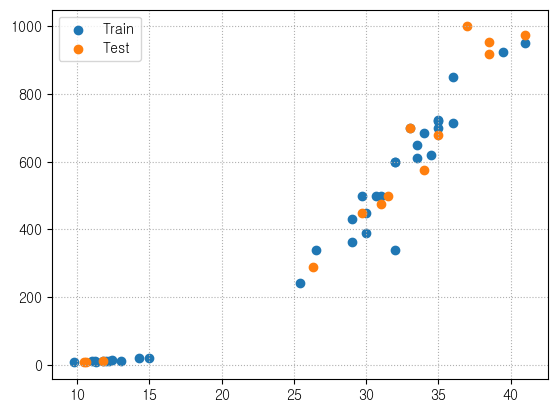

In [52]:
plt.scatter(train_X[:, 0], train_X[:, 1], label = "Train")
plt.scatter(test_X[:, 0], test_X[:, 1], label = "Test")
plt.legend()
plt.grid(linestyle = ':')
plt.show()

In [58]:
knn = KNeighborsClassifier(
    n_neighbors = 5,
    weights = 'uniform',
    metric = 'minkowski',
    p = 2
)

In [57]:
knn.fit(train_X, train_y)
print('Test ACC = ', knn.score(test_X, test_y))

print('classes = ', knn.classes_)
print('metrics = ', knn.effective_metric_)
print('samples = ', knn.n_samples_fit_)

Test ACC =  1.0
classes =  [0. 1.]
metrics =  euclidean
samples =  35


In [59]:
from sklearn.model_selection import train_test_split

In [68]:
train_X, test_X, train_y, test_y = train_test_split(
    fish_data, fish_target, stratify = fish_target, random_state = 911
)
print(train_X)

[[  35.   720. ]
 [  30.   390. ]
 [  10.5    7.5]
 [  33.5  610. ]
 [  31.   500. ]
 [  29.   363. ]
 [  11.3    8.7]
 [  25.4  242. ]
 [  11.2    9.8]
 [  41.   975. ]
 [  32.   340. ]
 [  41.   950. ]
 [  12.2   12.2]
 [  31.   475. ]
 [  26.5  340. ]
 [  34.5  620. ]
 [  15.    19.9]
 [  33.5  650. ]
 [  38.5  955. ]
 [  30.   450. ]
 [  36.   850. ]
 [  12.4   13.4]
 [  14.3   19.7]
 [  34.   575. ]
 [  37.  1000. ]
 [  11.     9.7]
 [  29.   430. ]
 [  36.   714. ]
 [  26.3  290. ]
 [  33.   700. ]
 [  35.   700. ]
 [  29.7  450. ]
 [  33.   700. ]
 [  11.8   10. ]
 [   9.8    6.7]
 [  38.5  920. ]]


In [69]:
knn = KNeighborsClassifier()
knn.fit(train_X, train_y)
knn.score(test_X, test_y)

1.0

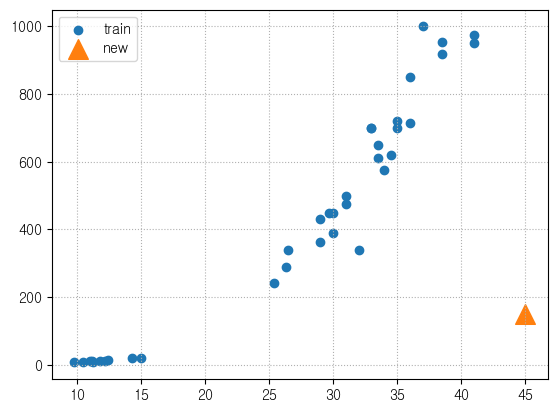

In [71]:
##
plt.scatter(train_X[:, 0], train_X[:, 1], label = 'train')
plt.scatter(45, 150, marker = '^', s = 200, label = 'new')
plt.legend()
plt.grid(linestyle = ':')
plt.show()

In [72]:
knn.predict([[25, 150]])

array([0.])

In [73]:
knn.kneighbors([[25,10]])

(array([[12.98768648, 13.05067048, 13.2       , 13.76154061, 13.8014492 ]]),
 array([[12, 21, 33,  6,  8]]))

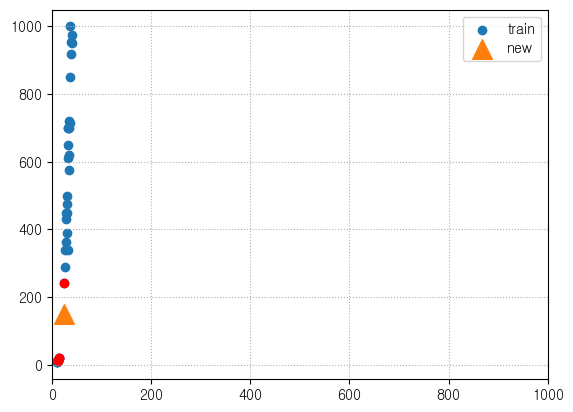

In [79]:
distance, index = knn.kneighbors([[25, 150]])

plt.scatter(train_X[:, 0], train_X[:, 1], label = 'train')
plt.scatter(25, 150, marker = '^', s = 200, label = 'new')
plt.scatter(train_X[index, 0], train_X[index, 1], c = 'r')
plt.xlim(0, 1000)
plt.legend()
plt.grid(linestyle = ':')
plt.show()

In [85]:
## 표준화 
mean = np.mean(train_X, axis = 0)
print('mean = ', mean)
std = np.std(train_X, axis = 0)
print('std = ', std)

train_scaled = (train_X - np.mean(train_X, axis = 0))/np.std(train_X, axis =0)
train_scaled

mean =  [ 27.19166667 445.18333333]
std =  [ 10.12322344 330.48504967]


array([[ 0.77132876,  0.83155552],
       [ 0.27741493, -0.16697679],
       [-1.64884898, -1.32436651],
       [ 0.62315461,  0.49871141],
       [ 0.3761977 ,  0.16586731],
       [ 0.17863217, -0.24867489],
       [-1.56982277, -1.32073549],
       [-0.17698579, -0.6148034 ],
       [-1.57970105, -1.31740705],
       [ 1.36402534,  1.60314867],
       [ 0.47498046, -0.31826957],
       [ 1.36402534,  1.52750228],
       [-1.48091828, -1.31014499],
       [ 0.3761977 ,  0.09022092],
       [-0.06832475, -0.31826957],
       [ 0.72193737,  0.52896997],
       [-1.20432654, -1.28684591],
       [ 0.62315461,  0.61974563],
       [ 1.11706843,  1.54263156],
       [ 0.27741493,  0.01457454],
       [ 0.87011152,  1.22491673],
       [-1.46116173, -1.30651397],
       [-1.27347448, -1.28745108],
       [ 0.67254599,  0.39280647],
       [ 0.96889428,  1.67879505],
       [-1.5994576 , -1.31770963],
       [ 0.17863217, -0.04594257],
       [ 0.87011152,  0.81340039],
       [-0.0880813 ,

[-0.21649889 -0.89318211]


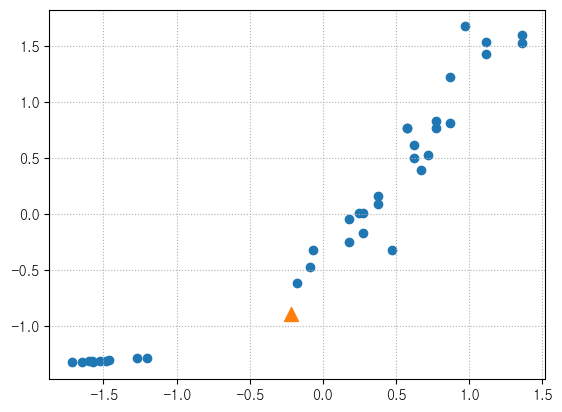

In [93]:
new = ([25, 150] - mean) / std
print(new)

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker = '^', s=100)

plt.grid(linestyle = ':')
plt.show()

In [94]:
test_scaled = (test_X - mean) / std

knn.fit(train_scaled, train_y)
print('Test ACC = ', knn.score(test_scaled, test_y))
print('Prediction = ', knn.predict([new]))

Test ACC =  1.0
Prediction =  [1.]


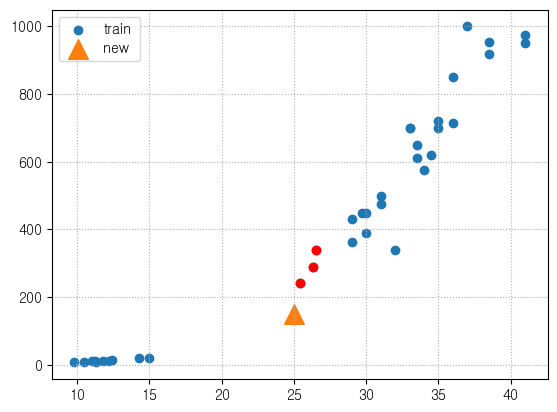

In [97]:
distance, index = knn.kneighbors([new])

plt.scatter(train_X[:,0], train_X[:,1], label = "train")
plt.scatter(25,150, marker = "^", s = 200, label = "new ")
plt.scatter(train_X[index,0],train_X[index,1],color = "r")

plt.legend()
plt.grid(linestyle = ":")
plt.show()

In [99]:
## Grid Search

knn = KNeighborsClassifier()

score_list = []
n_list = []

for n in range(3, 30):
    if n % 2 != 0:
        knn.n_neighbors = n
        knn.fit(train_scaled, train_y)
        score = knn.score(test_scaled, test_y)
        score_list.append(score)
        n_list.append(n)


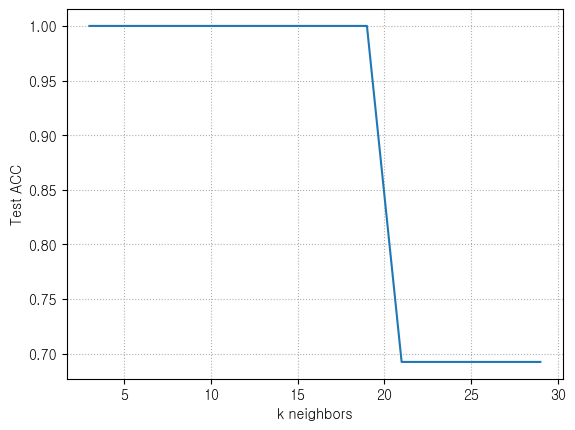

In [100]:
plt.plot(n_list, score_list)
plt.xlabel('k neighbors')
plt.ylabel('Test ACC')
plt.grid(linestyle =':')
plt.show()

## KNN을 이용하여 Seaborn iris 자료 분류

In [190]:
iris = sns.load_dataset('iris')
iris.head()
# iris.shape

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [132]:
## summary statistics
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


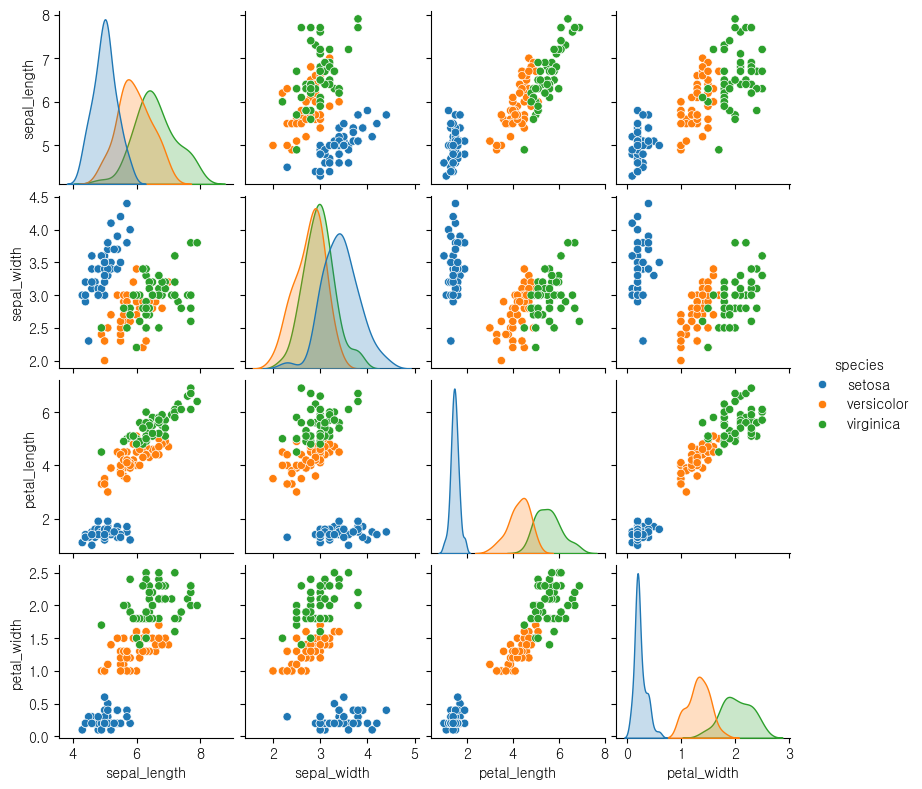

In [137]:
## visualization
sns.pairplot(iris, hue = 'species', height = 2)
plt.show()

In [152]:
X = iris.loc[:, :'petal_width']
y = iris['species']

X = iris.drop("species")
y = iris['species']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify=y)

print('train_X shape = ', train_X.shape)
print('test_X shape = ', test_X.shape)

train_X shape =  (120, 4)
test_X shape =  (30, 4)


In [153]:
test_y.value_counts()

species
setosa        10
versicolor    10
virginica     10
Name: count, dtype: int64

In [154]:
# scaling
mean = train_X.mean()
std = train_X.std()
# print(mean)
# print(std)
train_scaled = (train_X - mean)/std
test_scaled = (test_X - mean)/std
print(train_scaled)

     sepal_length  sepal_width  petal_length  petal_width
66      -0.249182    -0.086548      0.428080     0.392073
19      -0.864447     1.801775     -1.280444    -1.184980
32      -0.741394     2.509897     -1.280444    -1.447822
118      2.334929    -1.030710      1.794899     1.443441
17      -0.864447     1.093654     -1.337395    -1.184980
..            ...          ...           ...          ...
62       0.243030    -1.974872      0.143326    -0.265032
21      -0.864447     1.565735     -1.280444    -1.053559
65       1.104400     0.149492      0.371129     0.260652
9       -1.110553     0.149492     -1.280444    -1.447822
119      0.243030    -1.974872      0.712834     0.392073

[120 rows x 4 columns]


In [155]:
knn = KNeighborsClassifier() # k = 5 (default)

knn.fit(train_scaled, train_y)
print('train ACC(accuracy) =', knn.score(train_scaled, train_y))
print('test ACC(accuracy) =', knn.score(test_scaled, test_y))

train ACC(accuracy) = 0.9583333333333334
test ACC(accuracy) = 0.9666666666666667


In [156]:
print('classes =', knn.classes_)
print('feature names =', knn.feature_names_in_)
print('metric =', knn.effective_metric_)
print('samples =', knn.n_samples_fit_)
print('k =', knn.n_neighbors)

classes = ['setosa' 'versicolor' 'virginica']
feature names = ['sepal_length' 'sepal_width' 'petal_length' 'petal_width']
metric = euclidean
samples = 120
k = 5


C:\Users\user\AppData\Local\Temp\ipykernel_6600\1529913943.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


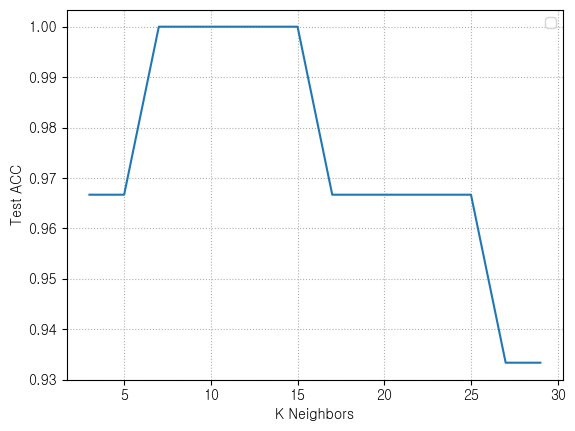

In [157]:
knn = KNeighborsClassifier()

score_list = []
n_list = []

for n in range(3, 30):
    if n % 2 != 0:
        knn.n_neighbors = n
        knn.fit(train_scaled, train_y)
        score = knn.score(test_scaled, test_y)
        score_list.append(score)
        n_list.append(n)

plt.plot(n_list, score_list)
plt.grid(linestyle = ':')
plt.xlabel('K Neighbors')
plt.ylabel('Test ACC')
plt.legend()
plt.show()

In [196]:
##
wine = pd.read_csv('https://bit.ly/wine-date')
print(wine.info())
print(wine.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB
None
   alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0


In [197]:
wine['class'] = wine['class'].astype('int32')

print(wine.head())
print(wine['class'].value_counts())

   alcohol  sugar    pH  class
0      9.4    1.9  3.51      0
1      9.8    2.6  3.20      0
2      9.8    2.3  3.26      0
3      9.8    1.9  3.16      0
4      9.4    1.9  3.51      0
class
1    4898
0    1599
Name: count, dtype: int64


In [198]:
## summary statistic
wine_group = wine.groupby('class', observed= True)
wine_group.describe()

for idx, data in wine_group:
    print('class = ', idx)
    print(data.describe())
    print('-'*60)

class =  0
           alcohol        sugar           pH   class
count  1599.000000  1599.000000  1599.000000  1599.0
mean     10.422983     2.538806     3.311113     0.0
std       1.065668     1.409928     0.154386     0.0
min       8.400000     0.900000     2.740000     0.0
25%       9.500000     1.900000     3.210000     0.0
50%      10.200000     2.200000     3.310000     0.0
75%      11.100000     2.600000     3.400000     0.0
max      14.900000    15.500000     4.010000     0.0
------------------------------------------------------------
class =  1
           alcohol        sugar           pH   class
count  4898.000000  4898.000000  4898.000000  4898.0
mean     10.514267     6.391415     3.188267     1.0
std       1.230621     5.072058     0.151001     0.0
min       8.000000     0.600000     2.720000     1.0
25%       9.500000     1.700000     3.090000     1.0
50%      10.400000     5.200000     3.180000     1.0
75%      11.400000     9.900000     3.280000     1.0
max      14.2000

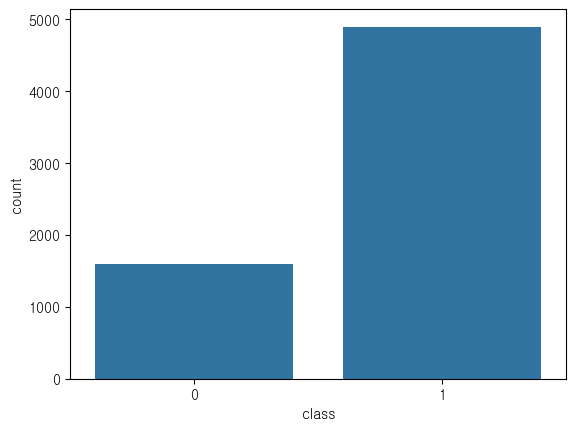

In [167]:
## visualization
sns.countplot(wine, x = 'class')
plt.show()

In [181]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [200]:
X = wine.drop(columns='class') 
y = wine['class']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, stratify=y)

print('train_X shape = ', train_X.shape)
print('test_X shape = ', test_X.shape)

train_X shape =  (5197, 3)
test_X shape =  (1300, 3)


In [204]:
dt = DecisionTreeClassifier()

In [205]:
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.86

In [202]:
test_y.value_counts()

class
1    980
0    320
Name: count, dtype: int64

In [206]:
# scaling
mean = train_X.mean()
std = train_X.std()
# print(mean)
# print(std)
train_scaled = (train_X - mean)/std
test_scaled = (test_X - mean)/std
print(train_scaled)

       alcohol     sugar        pH
823  -0.581802 -0.717960  2.425199
6115  1.833003 -0.675864 -0.363600
1816 -0.914879  0.797481  0.566000
6041 -1.164686  2.312922 -0.983333
701  -0.831610 -0.696912  1.557573
...        ...       ...       ...
3609  0.417427 -0.717960  0.070213
251  -0.498533 -0.760055  1.557573
6392 -0.914879  0.418621 -0.177680
4203  0.667235 -0.549577  0.566000
2485  0.750504 -0.802151 -0.177680

[5197 rows x 3 columns]


In [207]:
knn = KNeighborsClassifier() # k = 5 (default)

knn.fit(train_scaled, train_y)
print('train ACC(accuracy) =', knn.score(train_scaled, train_y))
print('test ACC(accuracy) =', knn.score(test_scaled, test_y))

train ACC(accuracy) = 0.9035982297479315
test ACC(accuracy) = 0.8569230769230769


C:\Users\user\AppData\Local\Temp\ipykernel_6600\1529913943.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


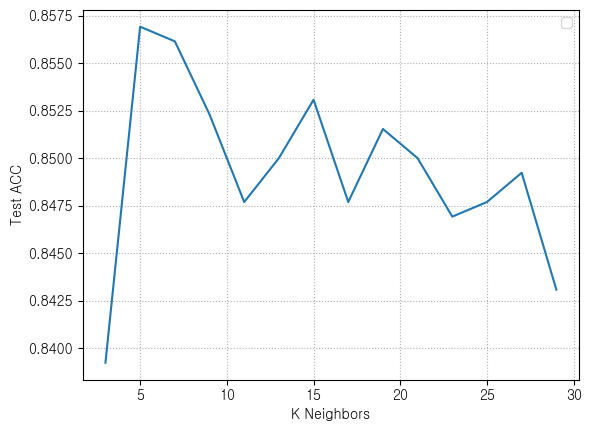

In [208]:
knn = KNeighborsClassifier()

score_list = []
n_list = []

for n in range(3, 30):
    if n % 2 != 0:
        knn.n_neighbors = n
        knn.fit(train_scaled, train_y)
        score = knn.score(test_scaled, test_y)
        score_list.append(score)
        n_list.append(n)

plt.plot(n_list, score_list)
plt.grid(linestyle = ':')
plt.xlabel('K Neighbors')
plt.ylabel('Test ACC')
plt.legend()
plt.show()